In [1]:
import pandas as pd
A=pd.read_csv("C:/Users/Suja4/OneDrive/Documents/Data Science/Dataset/train.csv")

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
A.isna().sum()

id                    0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               4
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        2
Luggage.room          9
Weight                0
Origin                0
Make                  0
dtype: int64

In [3]:
from Wd8pm import replacer
replacer(A)

In [4]:
A.nunique()

id                    70
Manufacturer          23
Model                 70
Type                   6
Min.Price             62
Price                 63
Max.Price             62
MPG.city              18
MPG.highway           18
AirBags                3
DriveTrain             3
Cylinders              5
EngineSize            23
Horsepower            46
RPM                   22
Rev.per.mile          59
Man.trans.avail        2
Fuel.tank.capacity    34
Passengers             6
Length                44
Wheelbase             26
Width                 14
Turn.circle           14
Rear.seat.room        23
Luggage.room          17
Weight                65
Origin                 2
Make                  70
dtype: int64

In [5]:
Y = A[["Origin"]]
X = A.drop(labels=["Origin","id","Model","Make"],axis=1)
from Wd8pm import catcon
cat,con = catcon(X)

In [6]:
from Wd8pm import prep_NN
Xnew,Ynew = prep_NN(X,Y)

In [7]:
Ynew.head(2)

,Origin
0,1
1,1


In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Ynew,test_size=0.2,random_state=21)
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [9]:
nn = Sequential()
nn.add(Dense(100,input_dim=len(xtrain.columns)))

nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1,activation="sigmoid"))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=4)
nn.compile(loss="binary_crossentropy",metrics="accuracy")
model = nn.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=250,callbacks=es)

Epoch 1/250
2/2 [==============================] - 1s 206ms/step - loss: 0.7739 - accuracy: 0.4821 - val_loss: 0.6016 - val_accuracy: 0.7143
Epoch 2/250
2/2 [==============================] - 0s 26ms/step - loss: 0.6120 - accuracy: 0.6786 - val_loss: 0.5860 - val_accuracy: 0.6429
Epoch 3/250
2/2 [==============================] - 0s 26ms/step - loss: 0.5330 - accuracy: 0.7679 - val_loss: 0.5624 - val_accuracy: 0.7143
Epoch 4/250
2/2 [==============================] - 0s 25ms/step - loss: 0.5046 - accuracy: 0.8214 - val_loss: 0.5036 - val_accuracy: 0.7143
Epoch 5/250
2/2 [==============================] - 0s 24ms/step - loss: 0.4644 - accuracy: 0.8214 - val_loss: 0.5110 - val_accuracy: 0.7143
Epoch 6/250
2/2 [==============================] - 0s 23ms/step - loss: 0.4235 - accuracy: 0.8571 - val_loss: 0.4718 - val_accuracy: 0.8571
Epoch 7/250
2/2 [==============================] - 0s 25ms/step - loss: 0.3954 - accuracy: 0.8750 - val_loss: 0.4681 - val_accuracy: 0.8571
Epoch 8/250
2/2 [==

2/2 [==============================] - 0s 25ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0676 - val_accuracy: 0.9286
Epoch 60/250
2/2 [==============================] - 0s 27ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0554 - val_accuracy: 1.0000
Epoch 61/250
2/2 [==============================] - 0s 26ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0541 - val_accuracy: 1.0000
Epoch 62/250
2/2 [==============================] - 0s 25ms/step - loss: 9.2011e-04 - accuracy: 1.0000 - val_loss: 0.0508 - val_accuracy: 1.0000
Epoch 63/250
2/2 [==============================] - 0s 25ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0571 - val_accuracy: 0.9286
Epoch 64/250
2/2 [==============================] - 0s 24ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0428 - val_accuracy: 1.0000
Epoch 65/250
2/2 [==============================] - 0s 27ms/step - loss: 8.6106e-04 - accuracy: 1.0000 - val_loss: 0.0536 - val_accuracy: 1.0000
Epoch 66/250
2/2 [

In [10]:
tr = model.history['accuracy']
ts = model.history['val_accuracy']

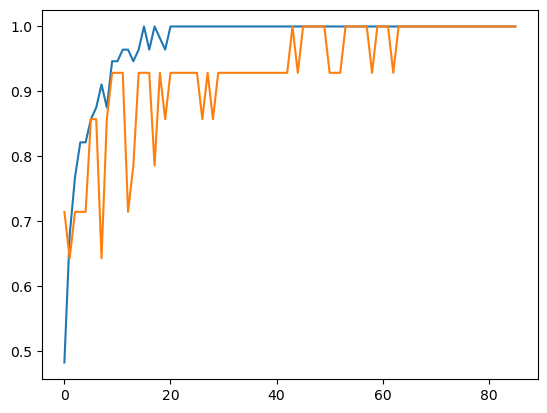

In [11]:
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)

In [12]:
w1 = []
for i in nn.predict(xtest):
    if(i<0.5):
        w1.append("USA")
    else:
        w1.append("Non-USA")

1/1 [==============================] - 0s 58ms/step


In [13]:
w2 = []
for i in ytest.Origin:
    if(i==0):
        w2.append("USA")
    else:
        w2.append("Non-USA")

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(w1,w2)

array([[ 4,  0],
       [ 0, 10]], dtype=int64)